In [1]:
import cv2
import numpy as np
from scipy.fftpack import dct, idct
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import time


In [2]:
# Provide paths directly
input_video = r'/content/A one minute TEDx Talk for the digital age ｜ Woody Roseland ｜ TEDxMileHigh.mp4'
output_video = '/content/compressed.mp4'
threshold = 0.1  # Change if needed

# Check input video path validity
assert os.path.exists(input_video), f"Input video not found: {input_video}"
assert input_video.lower().endswith(('.mp4', '.avi', '.mov', '.mkv')), "Unsupported input video format"


In [3]:
cap = cv2.VideoCapture(input_video)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frames.append(gray)

cap.release()
print(f"Total Frames Extracted: {len(frames)}")


Total Frames Extracted: 1936


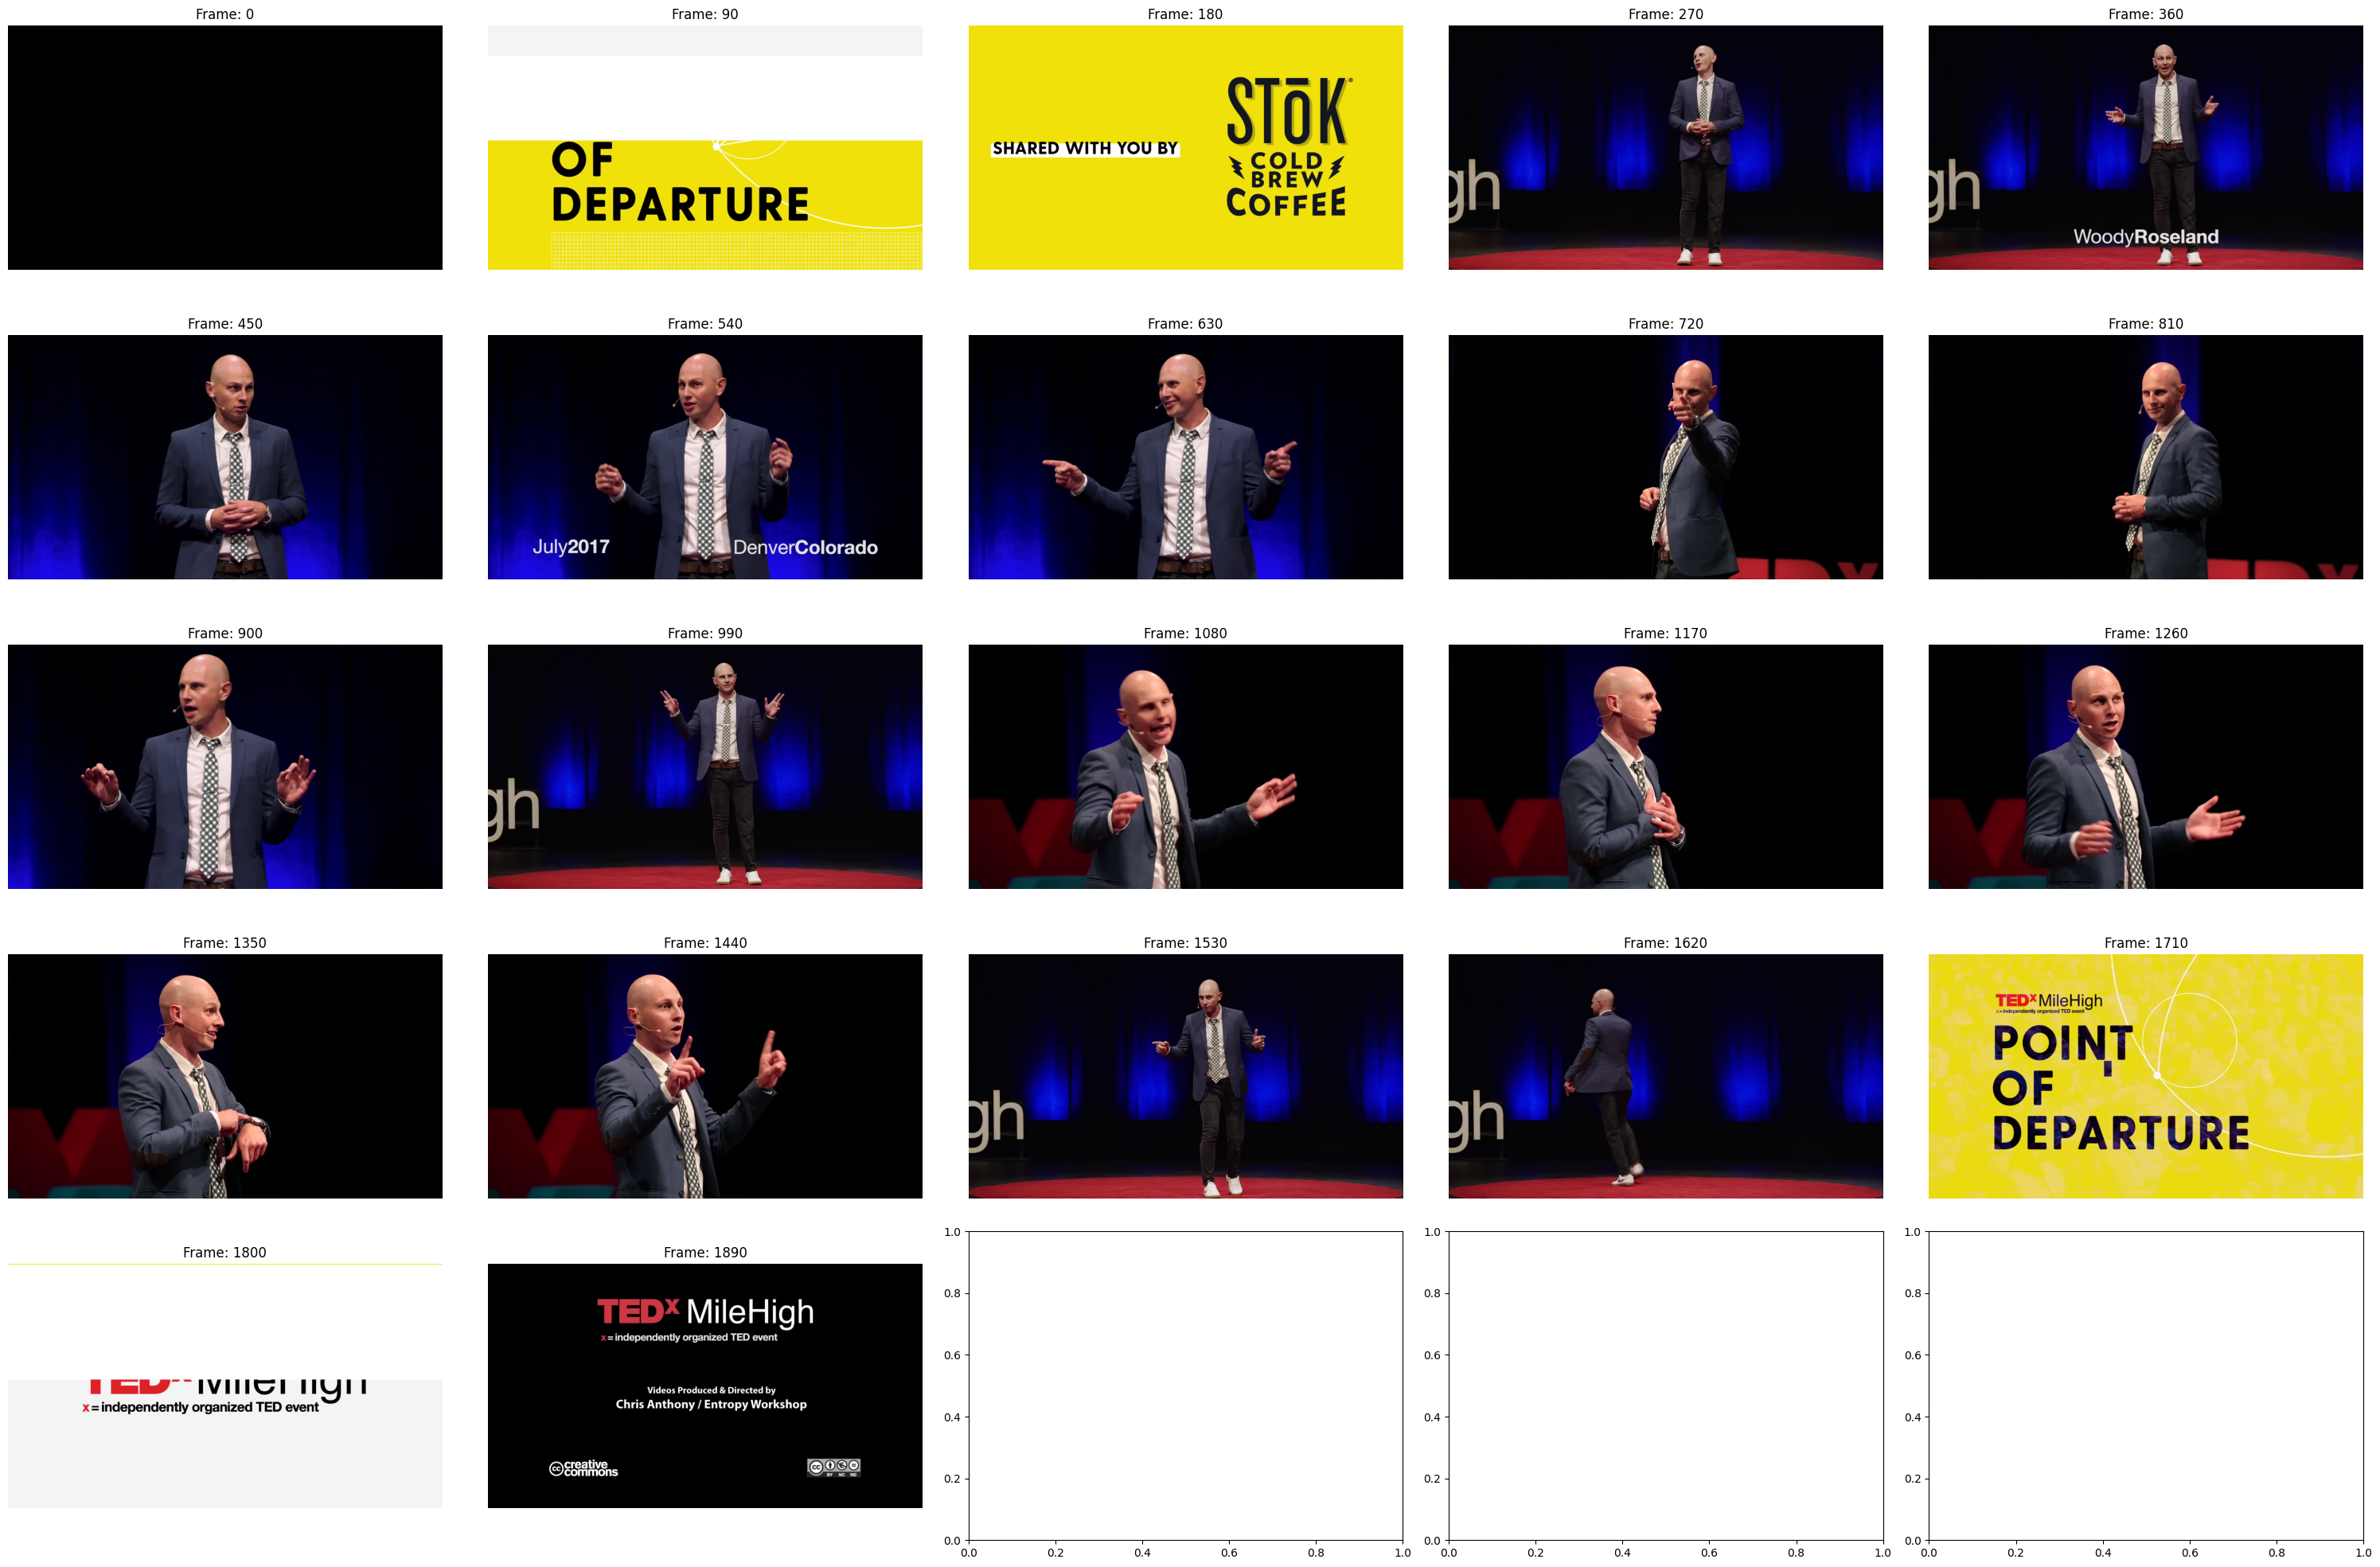

In [4]:
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture("/content/A one minute TEDx Talk for the digital age ｜ Woody Roseland ｜ TEDxMileHigh.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 90 == 0 and img_idx < 25:  # Only process if we haven't reached 25 frames
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1
    if img_idx >= 25:  # Stop once we've displayed 25 frames
        break

plt.tight_layout()
plt.show()
cap.release()

In [5]:
def calculate_frame_difference(frame1, frame2):
    diff = cv2.absdiff(frame1, frame2)
    return np.mean(diff) / 255.0

unique_frames = [frames[0]]
for i in range(1, len(frames)):
    if calculate_frame_difference(unique_frames[-1], frames[i]) > threshold:
        unique_frames.append(frames[i])

print(f"Unique Frames after Redundancy Removal: {len(unique_frames)}")


Unique Frames after Redundancy Removal: 52


Number of starting frames to display (max: 52): 20
Number of frames to display (max: 52): 40
Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


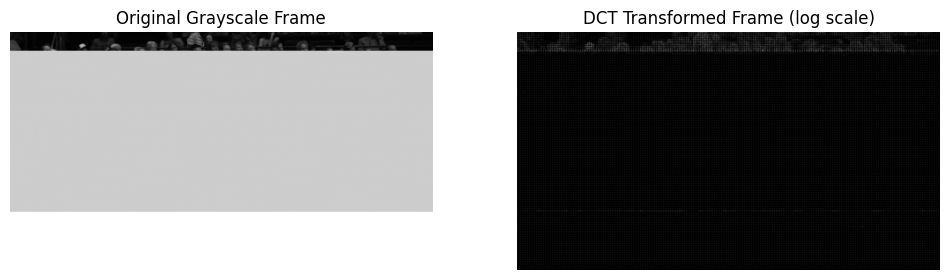


Quantization done. Displaying DCT frame after thresholding...


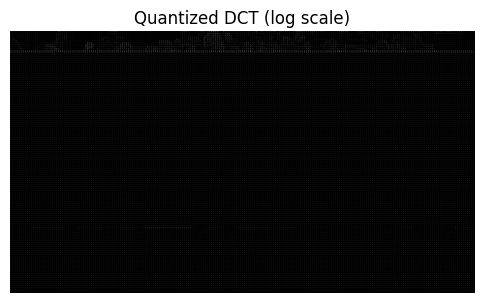

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


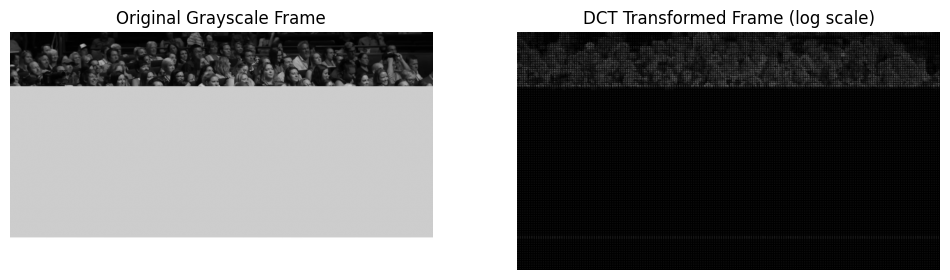


Quantization done. Displaying DCT frame after thresholding...


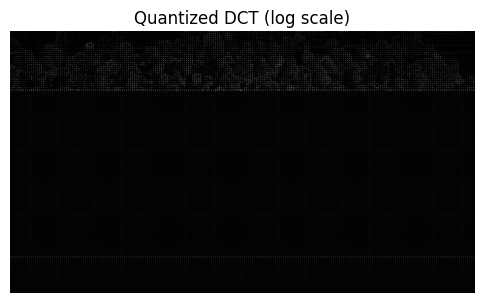

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


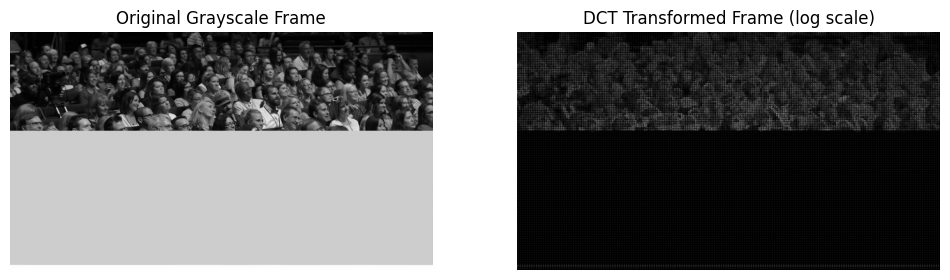


Quantization done. Displaying DCT frame after thresholding...


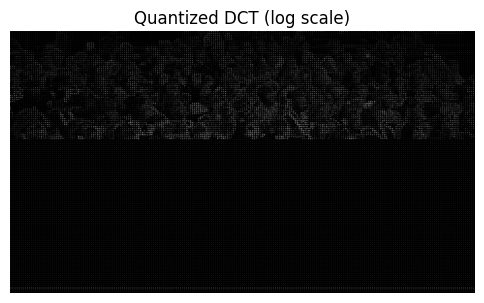

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


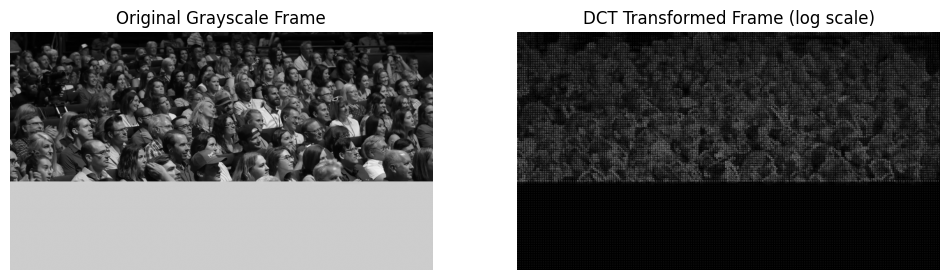


Quantization done. Displaying DCT frame after thresholding...


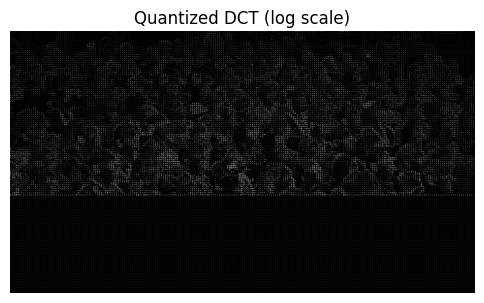

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


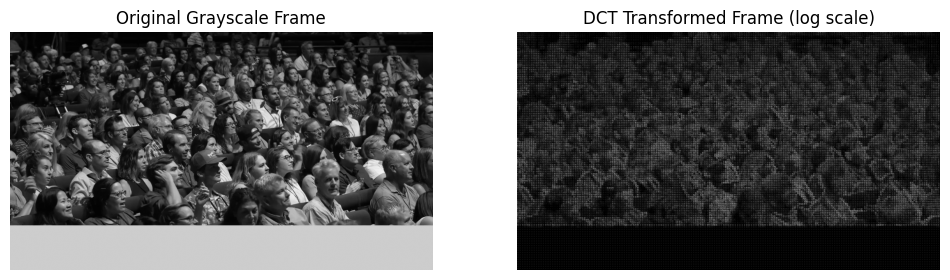


Quantization done. Displaying DCT frame after thresholding...


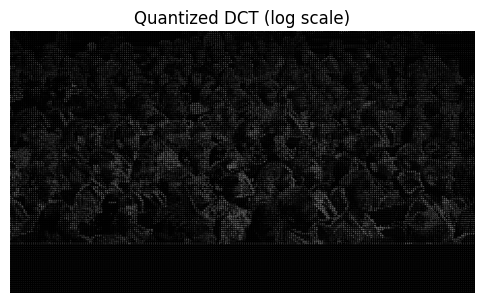

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


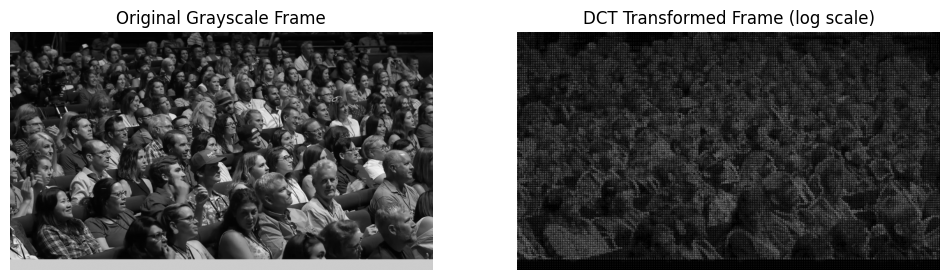


Quantization done. Displaying DCT frame after thresholding...


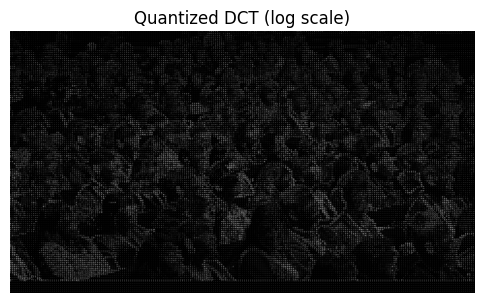

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


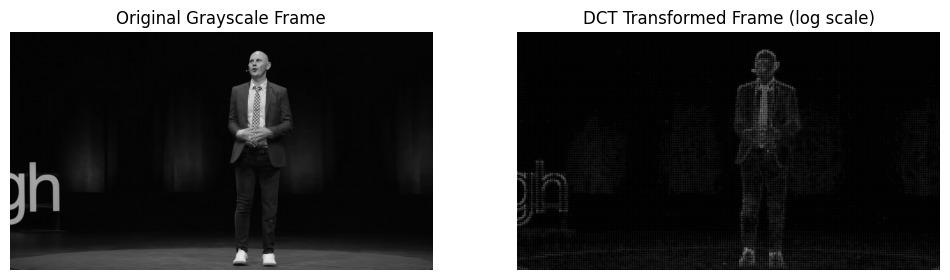


Quantization done. Displaying DCT frame after thresholding...


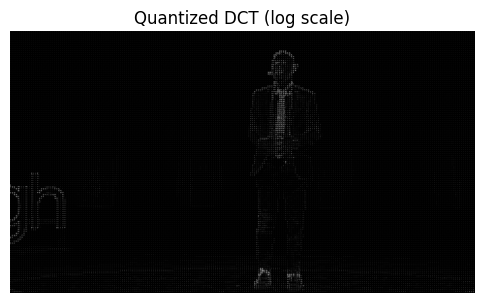

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


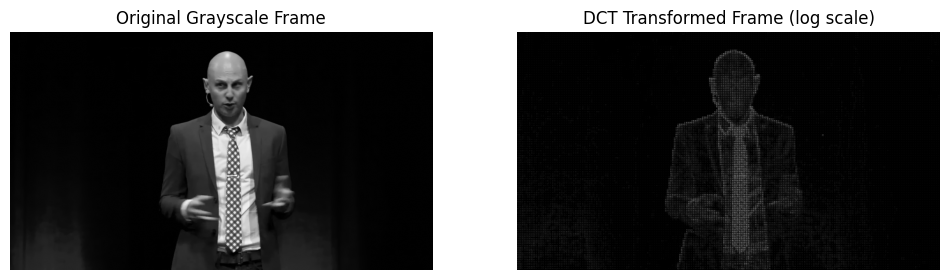


Quantization done. Displaying DCT frame after thresholding...


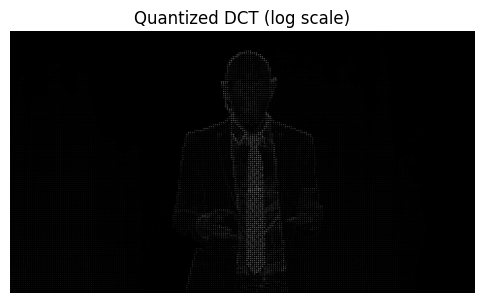

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


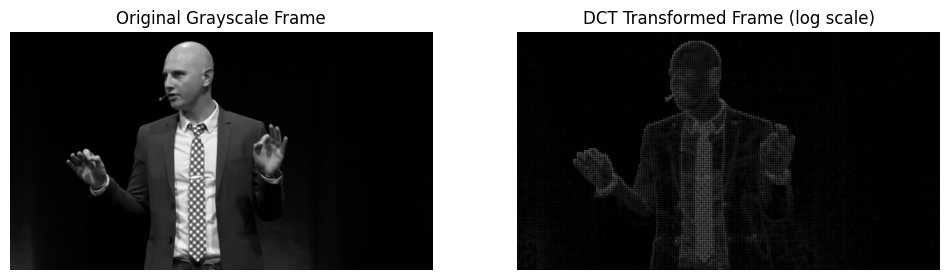


Quantization done. Displaying DCT frame after thresholding...


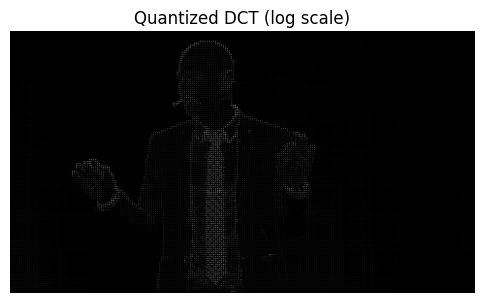

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


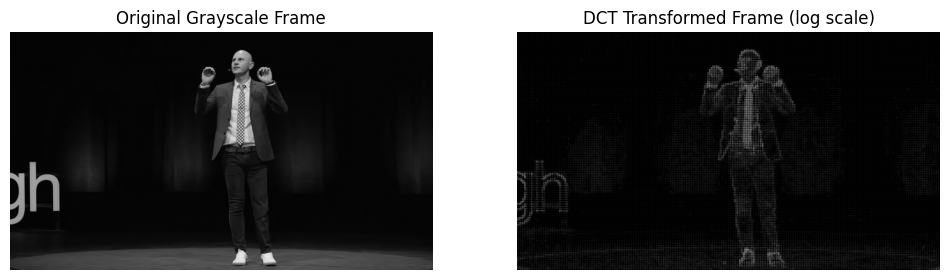


Quantization done. Displaying DCT frame after thresholding...


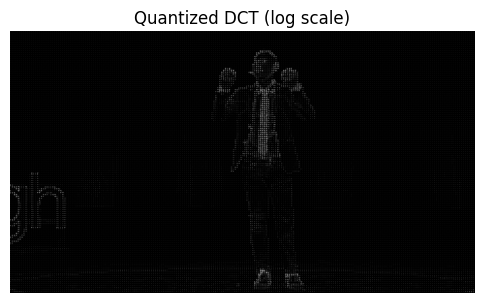

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


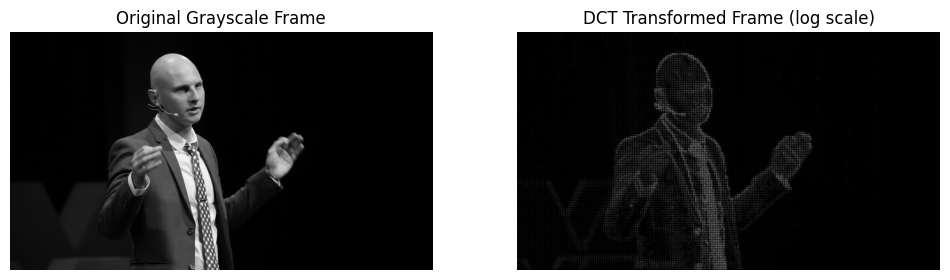


Quantization done. Displaying DCT frame after thresholding...


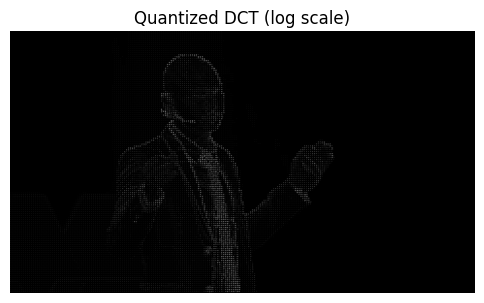

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


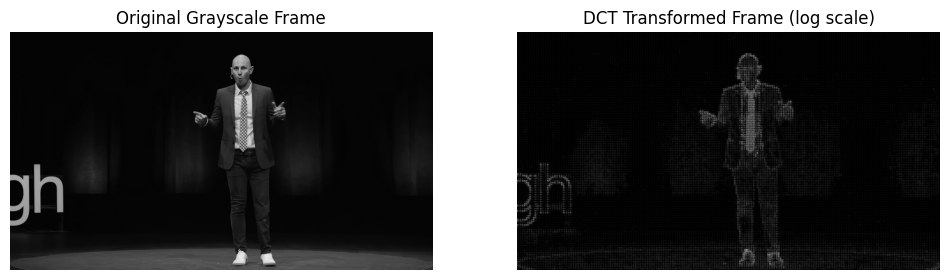


Quantization done. Displaying DCT frame after thresholding...


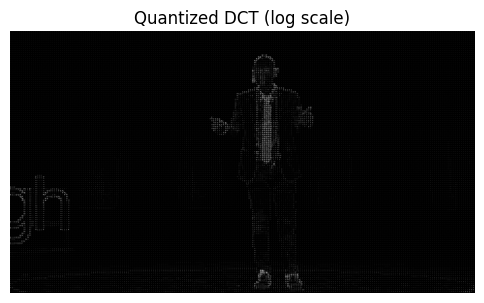

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


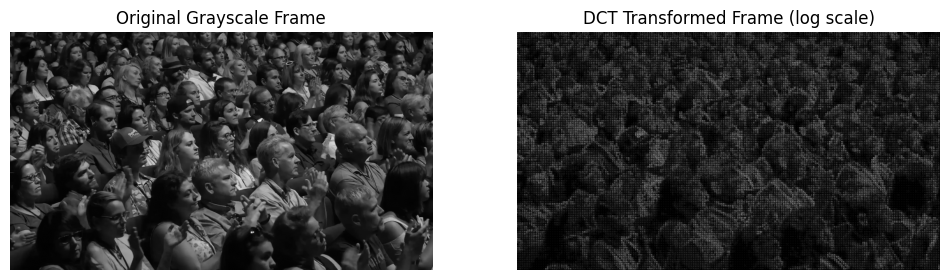


Quantization done. Displaying DCT frame after thresholding...


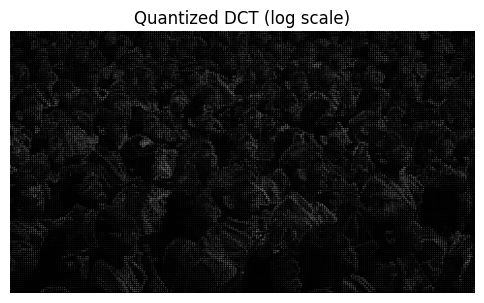

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


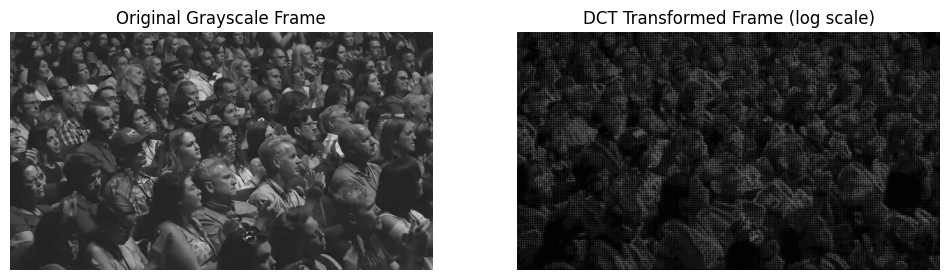


Quantization done. Displaying DCT frame after thresholding...


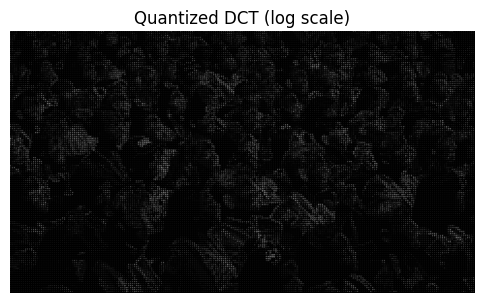

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


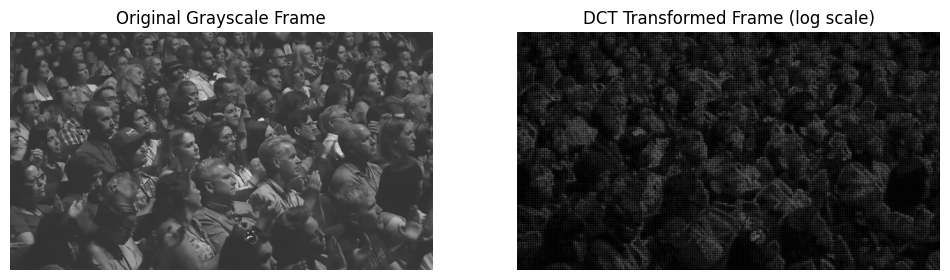


Quantization done. Displaying DCT frame after thresholding...


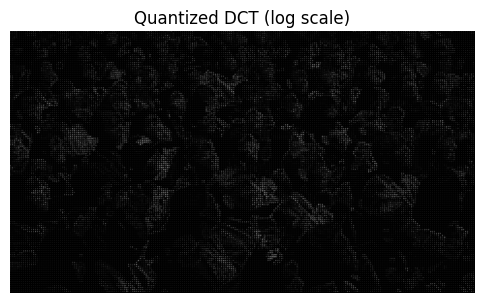

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


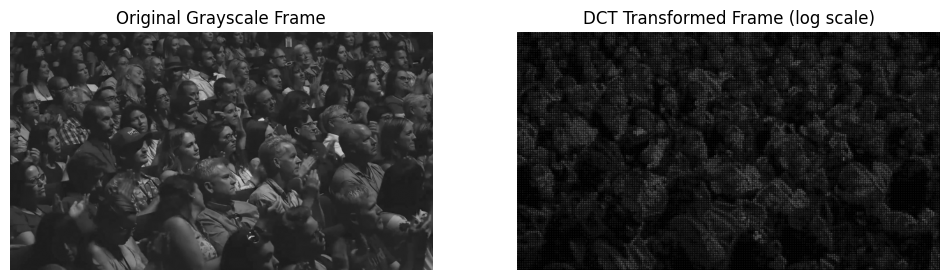


Quantization done. Displaying DCT frame after thresholding...


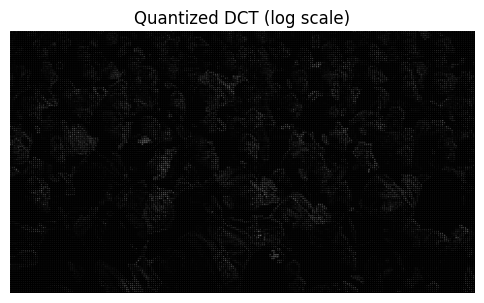

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


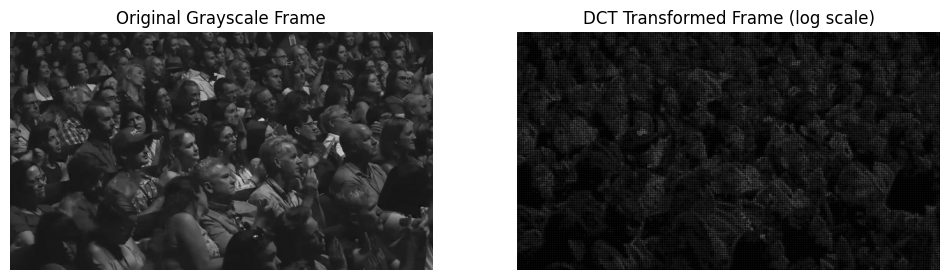


Quantization done. Displaying DCT frame after thresholding...


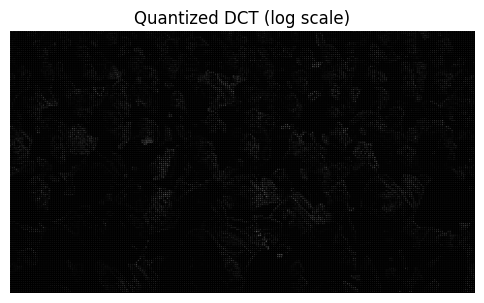

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


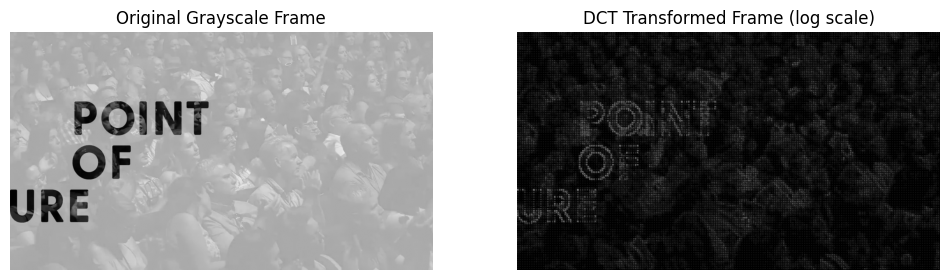


Quantization done. Displaying DCT frame after thresholding...


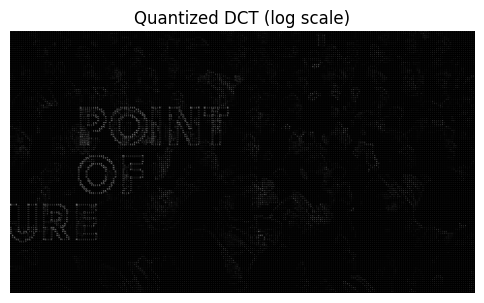

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


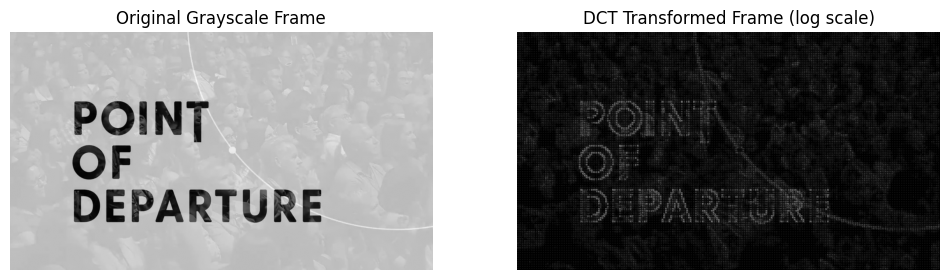


Quantization done. Displaying DCT frame after thresholding...


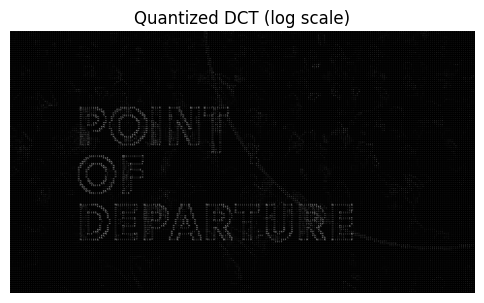

Applying DCT on frame of size 1080x1920 in 8x8 blocks...

Showing original grayscale frame and its DCT representation...


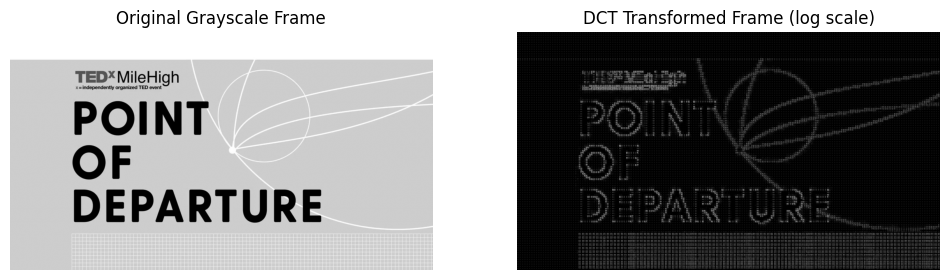


Quantization done. Displaying DCT frame after thresholding...


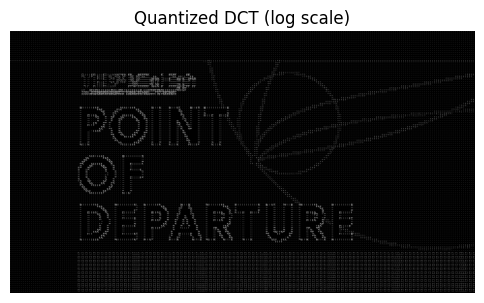

In [6]:
import matplotlib.pyplot as plt



def apply_dct(frame, block_size=8):
    height, width = frame.shape
    dct_frame = np.zeros_like(frame, dtype=np.float32)

    print(f"Applying DCT on frame of size {height}x{width} in {block_size}x{block_size} blocks...")

    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = frame[i:i+block_size, j:j+block_size]
            dct_block = dct(dct(block.T, norm='ortho').T, norm='ortho')
            dct_frame[i:i+block_size, j:j+block_size] = dct_block

    return dct_frame

compressed_frames = []

start = int(input(f"Number of starting frames to display (max: {len(unique_frames)}): "))

while True:
    try:

        num = int(input(f"Number of frames to display (max: {len(unique_frames)}): "))
        if 10 <= num <= len(unique_frames):
            break
        else:
            print(f"Please enter a number between 10 and {len(unique_frames)}.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

for i in range(start,num):
  frame_to_visualize = unique_frames[i]
  dct_frame = apply_dct(frame_to_visualize)

  # Before quantization
  print("\nShowing original grayscale frame and its DCT representation...")
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.title("Original Grayscale Frame")
  plt.imshow(frame_to_visualize, cmap='gray')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title("DCT Transformed Frame (log scale)")
  plt.imshow(np.log(np.abs(dct_frame) + 1), cmap='gray')
  plt.axis('off')
  plt.show()

  # Apply Quantization
  quantized_dct_frame = dct_frame.copy()
  quantized_dct_frame[np.abs(quantized_dct_frame) < 10] = 0
  compressed_frames.append(quantized_dct_frame)

  print("\nQuantization done. Displaying DCT frame after thresholding...")
  plt.figure(figsize=(6, 5))
  plt.title("Quantized DCT (log scale)")
  plt.imshow(np.log(np.abs(quantized_dct_frame) + 1), cmap='gray')
  plt.axis('off')
  plt.show()


In [7]:
def apply_idct(dct_frame, block_size=8):
    height, width = dct_frame.shape
    reconstructed = np.zeros_like(dct_frame, dtype=np.float32)
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = dct_frame[i:i+block_size, j:j+block_size]
            idct_block = idct(idct(block.T, norm='ortho').T, norm='ortho')
            reconstructed[i:i+block_size, j:j+block_size] = idct_block
    return reconstructed

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

for frame in compressed_frames:
    reconstructed = apply_idct(frame)
    reconstructed = np.clip(reconstructed, 0, 255).astype(np.uint8)
    out.write(cv2.cvtColor(reconstructed, cv2.COLOR_GRAY2RGB))

out.release()
print(f"Compressed video saved to: {output_video}")


Compressed video saved to: /content/compressed.mp4


In [8]:
def calculate_psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(255.0 / np.sqrt(mse))

compression_ratio = len(frames) / len(unique_frames)
last_original = frames[0]
last_reconstructed = apply_idct(compressed_frames[0])
last_reconstructed = np.clip(last_reconstructed, 0, 255).astype(np.uint8)
psnr = calculate_psnr(last_original, last_reconstructed)

print(f"Compression Ratio: {compression_ratio:.2f}")
print(f"PSNR: {psnr:.2f} dB")


Compression Ratio: 37.23
PSNR: 32.52 dB
